Enter k value for k clusters: 8


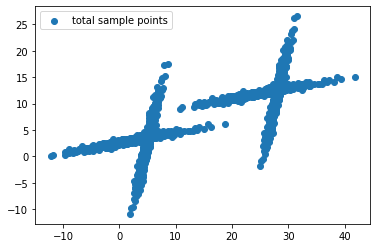

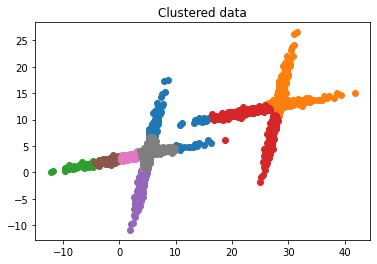

In [15]:
#1 Kmeans for non linearly separable case

import math as mt
import numpy as np
from matplotlib import pyplot as plt
import random 


def Eucledion_dist(k1,k2):
    d=np.sqrt( np.sum(np.square(k1[0] - k2[0])+np.square(k1[1] - k2[1])))
    return d


def lf(l,i):
    li=[]
    for j in range(len(l)):
        li.append(l[j][i])
    return li


def kmeans(means1,means,data,cdic):
    if means==means1:
        #print(1)
        return cdic
    else:
        
        means1=means.copy()
        for i in data:
            distl=[]
            #print(1)
            for j in cdic.values():
                if i in j:
                    j.remove(i)
            for m in range(len(means)):
                distl.append(Eucledion_dist(i,means[m]))
            #print(maxlist)
            val=min(distl)
            minind=distl.index(val)
            key='cluster'+str(minind)
            cdic[key].append(i)
        means=[]
        for i in cdic.values():
            t1=np.mean(lf(i,0))
            t2=np.mean(lf(i,1))
            tp=(t1,t2)            
            means.append(tp)
            
        #print(means,means1)
        kmeans(means1,means,data,cdic)
        return cdic                    
            


file1 = open(r"C:\Users\lenka\Desktop\Pattern Recog\Assignment_2\non_linearly_seperable data\Class1.txt","r+")
lines1 = file1.readlines()
list1=[]
for line in lines1:
    data=(line.strip())
    fir,sec=data.split("	")
    list1.append((float(fir),float(sec)))



file2 = open(r"C:\Users\lenka\Desktop\Pattern Recog\Assignment_2\non_linearly_seperable data\Class2.txt","r+")
lines2 = file2.readlines()
list2=[]
for line in lines2:
    data=(line.strip())
    fir,sec=data.split("	")
    list2.append((float(fir),float(sec)))     


data=list1+list2
k=int(input("Enter k value for k clusters: "))

plt.scatter(*zip(*data),label = "total sample points")
plt.legend()
plt.show()


cdic={}
means=[]
means1=[]
for i in range(k):
    cdic['cluster'+str(i)]=[]
    means.append(data[i])

cdic_out=kmeans(means1,means,data,cdic)

for i in range(k):
    plt.scatter(*zip(*cdic_out['cluster'+str(i)]))
plt.title("Clustered data")
plt.legend()
plt.show()

(1067, 1600, 3)


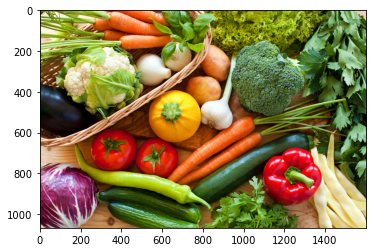

(534, 800, 3)

In [27]:
#2 Kmeans clustering for Image Segmentation

import cv2
img = cv2.imread("Image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#print(img.shape)
plt.imshow(img)
plt.show()
img = cv2.resize(img, None, fx=0.5, fy=0.5)
img.shape
#print(img)


<ipython-input-37-cc7930f2f145>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['class']=list1


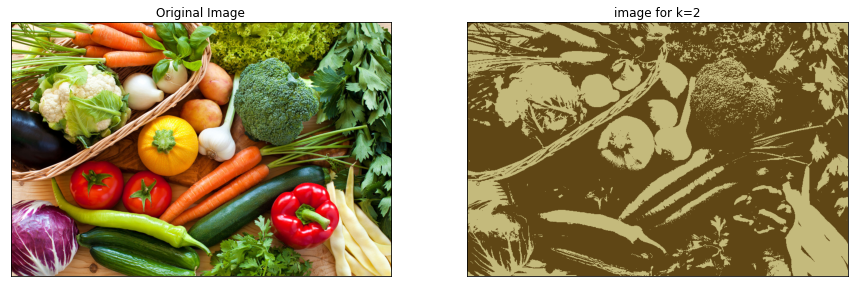

In [37]:
''' The function to calculate k means for desired value of k and data is data frame here'''
import numpy as np
import pandas as pd
def k_mean(data,k):
    iters=0
    q=1
    r_mean=data.sample(k)
    while q>0:
        ind=r_mean.index.tolist()
        indx=data.index.tolist()
        col=data.columns.tolist()
        dist=pd.DataFrame()
        for i in range (k):
            distance=(data[col] - np.array(r_mean.loc[ind[i]])).pow(2).sum(1).pow(0.5)
            v=i+1
            v=str(v)          
            dist['d'+v]=distance
        col_dist=dist.columns.tolist()
        var=pd.DataFrame(dist.idxmin(axis=1),columns=['class'])
        #print(var)
        #print(1)
        u_mean=[]
        col.append('class')
        new_data=pd.DataFrame(columns=col)
        #print(new_data)
        for i in range(k):
            index1=(var[var['class']==col_dist[i]]).index.tolist()
            #print(index1)
            cluster=data.loc[data.index.isin(index1)]
            m=cluster.mean().tolist()
            u_mean.append(m)
            l=len(cluster)
            list1=[]
            for j in range (l):
                list1.append(i+1)
            cluster['class']=list1
            new_data=new_data.append(cluster)
            #print(new_data)
        col.remove(col[-1])
        u_mean=pd.DataFrame(u_mean,columns=col,index=ind)
        if u_mean.equals(r_mean):
            q=0
        else:
            r_mean=u_mean    
                
        res=new_data.reindex(indx)
        iters=iters+1
        label=res['class'].tolist()
        temp1=set(label)
        temp1=list(temp1)
        var3=0
        for i in range (k):
            for j in range (len(label)):
                var2=label[j]
                if var2==temp1[i]:
                    label[j]=var3
            var3=var3+1
    return new_data,u_mean,res,iters,label

'''Vectorized the image to get a form of n rows and 3 columns'''
vectorized = img.reshape((-1,3))
#print(vectorized)
vectorized = np.float32(vectorized)

''' Converting pixels into data frame to apply the kmeans function'''
data=pd.DataFrame(vectorized,columns=['R','G','B'])
#print(data)
k=2

[x,y,z,a,b]=k_mean(data,k)

''' The data is converted back to image to display'''
m=y.index.tolist()
n=x.index.tolist()
o=z.index.tolist()


list_=[]
for i in range (len(m)):
    h1=(y.loc[m[i]]).tolist()
    h2=x[x['class']==i+1]
    l1=len(h2)
    for j in range (l1):
        list_.append(h1)
        
    
res1=pd.DataFrame(list_,columns=['R','G','B'],index=n)
res1=res1.reindex(o)
list_1=[]
for g in range (len(res1)):
    h3=(res1.loc[g]).tolist()
    list_1.append(h3)
listx=np.array(list_1)    
listx=np.uint8(listx)
result_image = listx.reshape((img.shape))
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(result_image)
h5=str(k)
plt.title('image for k='+h5), plt.xticks([]), plt.yticks([])
plt.show()